In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
from matplotlib import font_manager
from PIL import Image,ImageOps

In [2]:
rows=21
cols=21
walls_removed=10
no_of_obstacles=10
maze=np.ones((rows,cols),dtype=int)
for r in range(1,rows-1,2):
    for c in range(1,cols-1,2):
            maze[r,c]=0
maze[0,0]=maze[0,1]=0
maze[rows-1,cols-1]=maze[rows-1,cols-2]=0
print(maze)

[[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]]


In [3]:
visited=np.zeros((rows, cols), dtype=bool)
stack=[(1,1)]
visited[1,1]=True
while stack:
    r,c=stack[-1]
    neighbors=[]
    for dr,dc in [(-2,0),(2,0),(0,-2),(0,2)]:
        nr,nc=r+dr,c+dc
        if 1<=nr<rows-1 and 1<=nc<cols-1 and not visited[nr,nc]:
            neighbors.append((nr, nc))
    if neighbors:
        nr,nc=random.choice(neighbors)
        # Remove wall between
        maze[(r+nr)//2, (c+nc)//2] = 0
        visited[nr,nc]=True
        stack.append((nr, nc))
    else:
        stack.pop()

In [4]:
start=(0,0)
end=(rows-1,cols-1)
def bfs_path(maze, start, end):
    queue = deque([start])
    parent = {start: None}
    while queue:
        r,c=queue.popleft()
        if (r, c) == end:
            break  # stop BFS once we reach the end
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr, nc = r + dr, c + dc
            if 0<=nr<rows and 0<=nc<cols and maze[nr,nc]==0 and (nr,nc) not in parent:
                parent[(nr,nc)] = (r,c)
                queue.append((nr,nc))
    # After BFS finishes, reconstruct path
    bfspath=set()
    cell=end
    while cell is not None:
        bfspath.add(cell)
        cell=parent[cell]
    return bfspath
correct_path=bfs_path(maze,start,end)
print('BFS Shortest Path  Found')
print(correct_path)

BFS Shortest Path  Found
{(12, 1), (4, 3), (20, 20), (9, 2), (5, 1), (9, 5), (17, 15), (11, 5), (13, 2), (17, 18), (13, 5), (13, 11), (11, 11), (1, 3), (13, 8), (7, 4), (15, 11), (7, 1), (15, 14), (18, 19), (12, 9), (12, 3), (3, 3), (20, 19), (5, 3), (9, 1), (11, 4), (8, 5), (9, 4), (11, 1), (17, 17), (0, 1), (1, 2), (11, 10), (13, 1), (13, 7), (6, 1), (15, 13), (7, 3), (16, 15), (12, 5), (12, 11), (14, 11), (5, 2), (9, 3), (0, 0), (17, 16), (1, 1), (11, 3), (17, 19), (11, 9), (10, 1), (2, 3), (19, 19), (13, 9), (13, 3), (13, 6), (7, 2), (7, 5), (15, 12), (15, 15)}


In [5]:
i=0
before=(maze==1).sum()
while i<walls_removed:
    r=random.randint(1,rows-2)
    c=random.randint(1,cols-2)
    if maze[r,c]==1:
        maze[r,c]=0
        i+=1
after=(maze==1).sum()
print(before)
print(after)

238
228


In [6]:
obstacles=[]
forbidden=set()
forbidden.add((0,0))
forbidden.add((rows-1,cols-1))
forbidden.add((0,1))
forbidden.add((rows-1,cols-2))
walls=np.argwhere(maze==1)
for (wr,wc) in walls:
    forbidden.add((int(wr),int(wc)))
for cell in correct_path:
    forbidden.add((cell))
j=0
while j<no_of_obstacles:
    col=random.randint(0,cols-1)
    row=random.randint(0,rows-1)
    if (row,col) not in obstacles and (row,col) not in forbidden:
        obstacles.append((row,col))
        forbidden.add((row,col))
        forbidden.add((row+1,col))
        forbidden.add((row-1,col))
        forbidden.add((row,col+1))
        forbidden.add((row,col-1))
        forbidden.add((row-1,col-1))
        forbidden.add((row+1,col+1))
        forbidden.add((row-1,col+1))
        forbidden.add((row+1,col-1))
        j+=1
        maze[row,col]=1
print(len(forbidden))
print(len(walls))
# forbidden
obstacles

318
228


[(7, 19),
 (5, 5),
 (3, 4),
 (1, 15),
 (7, 15),
 (11, 17),
 (17, 9),
 (1, 18),
 (17, 7),
 (19, 6)]

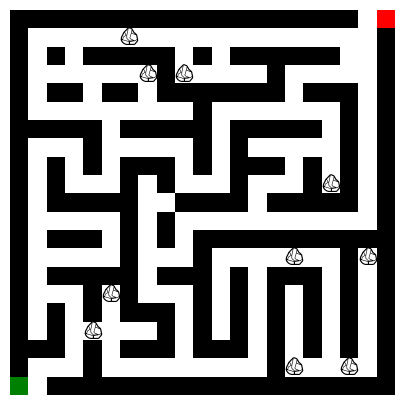

Maze Generated Successfully!


In [7]:
emoji_font=font_manager.FontProperties(family='Segoe UI Emoji') 
plt.figure(figsize=(5,5),dpi=100)
rect_start=patches.Rectangle((0,0),1,1,facecolor="green")
rect_end=patches.Rectangle((rows-1,cols-1),1,1,facecolor="red")
plt.gca().add_patch(rect_start)
plt.gca().add_patch(rect_end)
plt.imshow(maze,cmap="grey_r",aspect='equal',interpolation=None,origin="lower",extent=(0, cols, 0, rows))
for r,c in obstacles:
    plt.gca().add_patch(patches.Rectangle((c,r),1,1,facecolor="white"))
for r,c in obstacles:
    plt.text(c+0.5,r+0.5,'🪨',ha='center',va='center',fontsize=12,fontproperties=emoji_font)
plt.gca().set_aspect('equal')
plt.axis("off")
plt.savefig("../images/maze_example.png",bbox_inches='tight')
plt.show()
print('Maze Generated Successfully!')

In [8]:
n_states=rows*cols
actions=[0,1,2,3]
Q=np.zeros((n_states,len(actions)))
episodes=500
alpha=0.1
gamma=0.9
epsilon=0.2
def state_to_pos(state):
    return divmod(state,cols)
def pos_to_state(pos):
    return pos[0]*cols+pos[1]
def is_valid(pos):
    r,c=pos
    return 0<=r<rows and 0<=c<cols and maze[r,c]==0
def step(state,action):
    row,col=state_to_pos(state)
    old_r,old_c=row,col
    if action==0:
        new_pos=(row-1, col)
    elif action==1:
        new_pos=(row+1, col)
    elif action==2:
        new_pos=(row, col-1)
    elif action==3:
        new_pos=(row, col+1)
    if is_valid(new_pos):
        row,col=new_pos
        reward=-1
    else:
        row,col=old_r,old_c
        reward=-20
    
    if (row,col)==(rows-1,cols-1):
        reward=100
        done=True
    else:
        done=False
    
    next_state=pos_to_state((row,col))
    return next_state,reward,done

for epi in range(episodes):
    state=0 
    done=False
    while not done:
        #Explore and exploit
        if random.uniform(0,1)<epsilon:
            action=random.choice(actions)
        else:
            action=np.argmax(Q[state])  
        next_state,reward,done=step(state,action)
        #Q-learning update
        Q[state,action]=Q[state,action]+alpha*(reward+gamma*np.max(Q[next_state])-Q[state,action])
        state=next_state
state=0
path=[state_to_pos(state)]
done=False
while not done:
    action=np.argmax(Q[state])
    next_state,reward,done=step(state,action)
    path.append(state_to_pos(next_state))
    state=next_state
print('Agent Learned Optimal Path!')
print("Path:",path)

Agent Learned Optimal Path!
Path: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (13, 2), (13, 3), (12, 3), (11, 3), (11, 4), (11, 5), (12, 5), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (12, 9), (11, 9), (11, 10), (11, 11), (12, 11), (13, 11), (14, 11), (15, 11), (15, 12), (15, 13), (15, 14), (15, 15), (16, 15), (17, 15), (17, 16), (17, 17), (17, 18), (18, 18), (18, 19), (19, 19), (20, 19), (20, 20)]


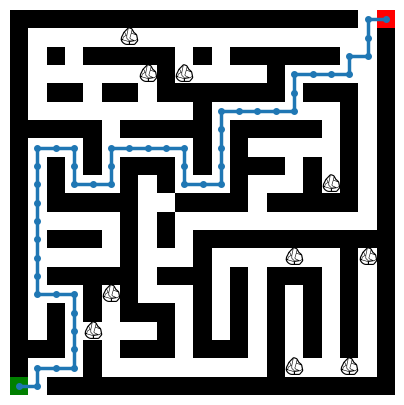

In [9]:
plt.figure(figsize=(5,5),dpi=100)
rect_start=patches.Rectangle((0,0),1,1,facecolor="green")
rect_end=patches.Rectangle((rows-1,cols-1),1,1,facecolor="red")
plt.gca().add_patch(rect_start)
plt.gca().add_patch(rect_end)
plt.imshow(maze,cmap="grey_r",aspect='equal',interpolation=None,origin="lower",extent=(0, cols, 0, rows))
for r,c in obstacles:
    plt.gca().add_patch(patches.Rectangle((c,r),1,1,facecolor="white"))
for r,c in obstacles:
    plt.text(c+0.5,r+0.5,'🪨',ha='center',va='center',fontsize=12,fontproperties=emoji_font)
path_x=[c+0.5 for (r,c) in path]
path_y=[r+0.5 for (r,c) in path]
plt.plot(path_x,path_y,linewidth=2.5,marker="o",markersize=4)
plt.gca().set_aspect('equal')
plt.axis("off")
plt.savefig("../images/maze_with_path.png",bbox_inches="tight")
plt.show()